<a href="https://colab.research.google.com/github/songhyun7597/ITB2022/blob/main/%EC%B9%B4%EB%93%9C%EC%82%AC_%EC%9D%B4%ED%83%88_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

분류(의사결정나무/앙상블모델(랜덤포레스트 / 그래디언트 부스팅))


In [ ]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=5d50661b72e72920e4789186dfaa9fc0e0b6b33634ddacfb0538b2839ac0554f
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 5.3 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
import mglearn 

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns      
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ITB기말과제/churn.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##데이터 전처리

In [ ]:
#결측치 확인
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data[['Geography','Gender']].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [ ]:
print(data['Geography'].value_counts())
print(data['Gender'].value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


In [ ]:
print(data['Exited'].value_counts())
#4:1정도 비율

0    7963
1    2037
Name: Exited, dtype: int64


##시각화

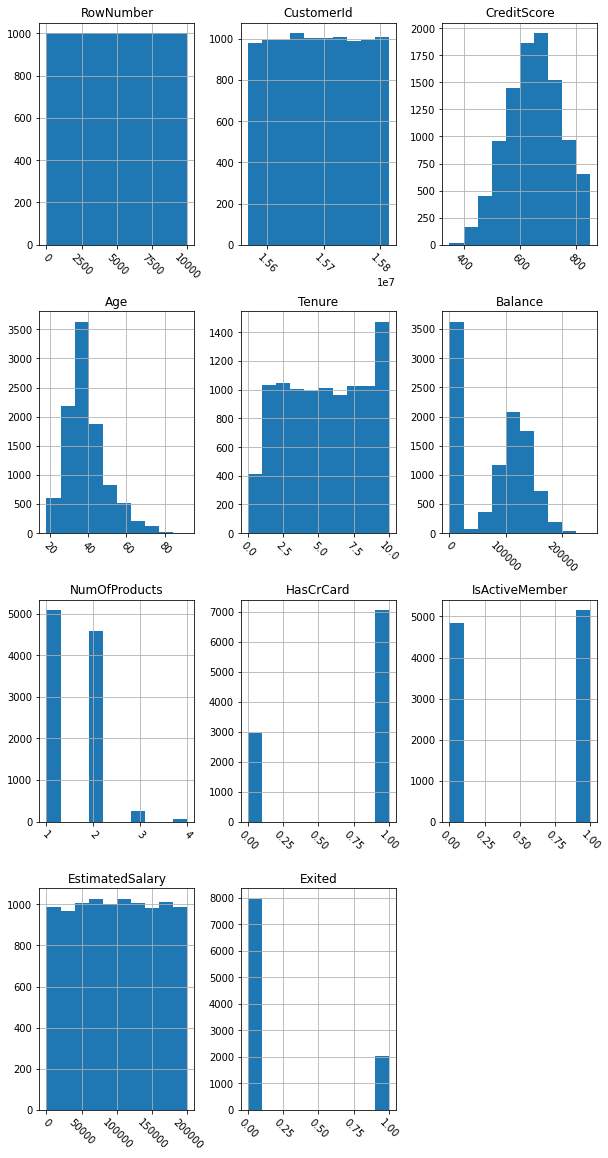

In [ ]:
data.hist(figsize=(10,20), xrot=-45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

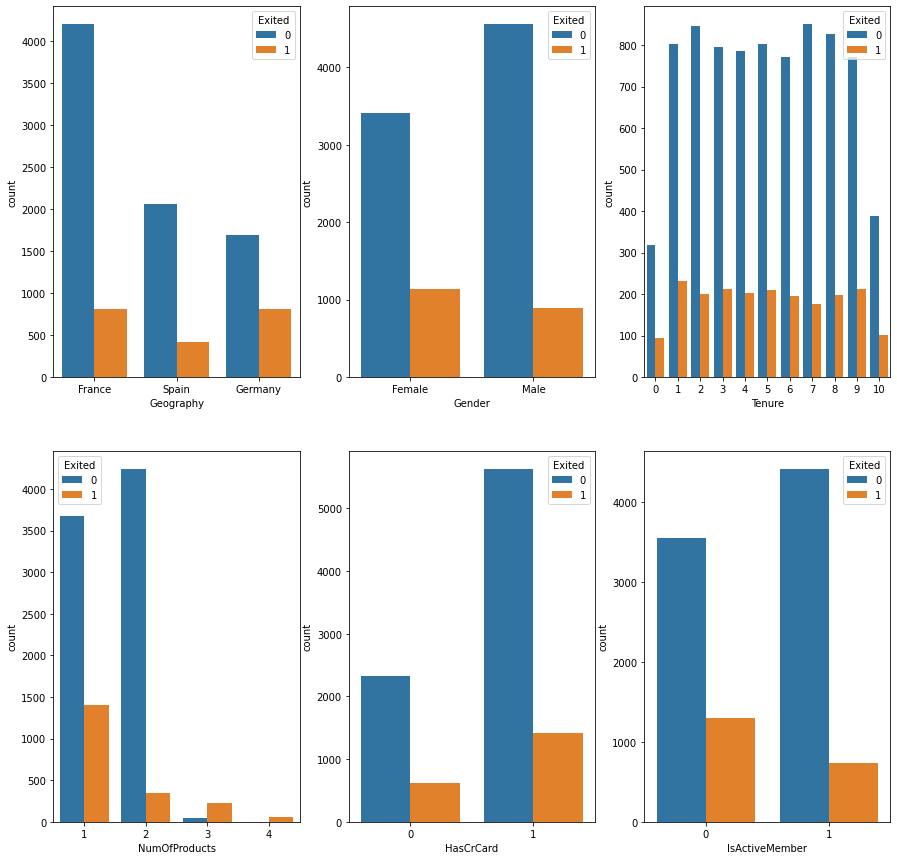

In [ ]:
fig, axarr = plt.subplots(2, 3, figsize=(15, 15))

#visulazie the count of Exited and NotExited for each feature


sns.countplot('Geography', hue = 'Exited',data = data, ax = axarr[0][0])
sns.countplot('Gender', hue = 'Exited',data = data, ax = axarr[0][1])
sns.countplot('Tenure', hue = 'Exited',data = data, ax = axarr[0][2])
sns.countplot('NumOfProducts', hue = 'Exited',data = data, ax = axarr[1][0])
sns.countplot('HasCrCard', hue = 'Exited',data = data, ax = axarr[1][1])
sns.countplot('IsActiveMember', hue = 'Exited',data = data, ax = axarr[1][2])

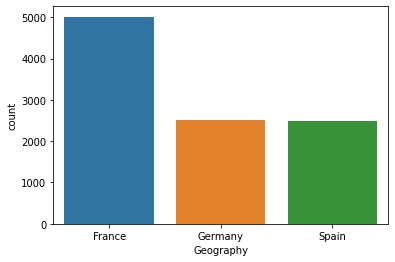

In [ ]:
sns.countplot(x=data['Geography'], data=data, order = data['Geography'].value_counts().index)
plt.show()

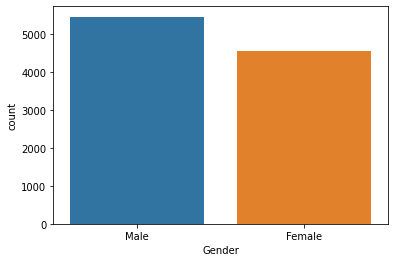

In [ ]:
sns.countplot(x=data['Gender'], data=data, order = data['Gender'].value_counts().index)
plt.show()

In [ ]:
#필요없는 칼럼 삭제
data = data.drop(["RowNumber"], axis=1)
data = data.drop(["CustomerId"], axis=1)
data = data.drop(["Surname"], axis=1)

In [ ]:
data.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


#데이터 파악하기
1. 고객 1000명
2. 칼럼 14개
3. 중복값과 결측치 없음
4. 지리: 프랑스,독일,스페인
5. 신용 점수 평균= 650점, 큰 차이 없음 
6. 연령: 19~92

In [ ]:
# 참고: https://www.kaggle.com/code/nelsonqs/eda-and-business-recommendation